# Lab 1

In the computer labs we will work with the Python programming language within a Jupyter notebook. Each week a new notebook is made available that contains the exercises that are to be handed-in. 

* It is expected that you work individually and the usual plagarism rules apply.
* Submissions are to be made on canvas. Make sure that you add your student ID in the submission comments.
* The main notebook file you submit should read "Lab[number]_[last name].ipynb", for example "Lab2_Bongers.ipynb". 
* Please make sure your code will run without problems

_You need to fill in everywhere that there is a_ '__TODO__'

Feel free ask any questions during the computer lab sessions, or email the TA.

**The due date for the labs is next Wednesday at 23:59**

In [2]:
# Load the numpy numerical computation library
import numpy as np

# Load matplotlib, which controls plotting pretty graphs
import matplotlib.pyplot as plt
%matplotlib inline

## Exercise 1

In this exercise, we will perform the same computations as in Problem 4 from Homework 1, herein refered to as Problem 1.4. 

### Matrix-vector products: 
__TODO__ (0.5 pt) Write a function `same_size(A,B)` that given an array $\mathbf{A}$ and a vector $\mathbf{b}$ determines whether the product $\mathbf{A} \mathbf{b}$ is well-defined. The function should check that the number of columns of $\mathbf{A}$ equals the number of rows of $\mathbf{b}$ returning `True` or `False` accordingly.

We will use the python library `numpy`, which is designed to perfom matrix computations. Recall that in `numpy`, there is a function `shape` that given an array returns a tuple $(m,n,...)$, where $m$ is number of rows, $n$ is number of columns etc. 

In [76]:
def same_size(A,B):
    if A.shape[1] == B.shape[0]:
        return True
    return False

__TODO__ Now we define $\mathbf{A}$ and $\mathbf{b}$ as in Homework problem 4 and check that our function indeed says that the product $\mathbf{A}\mathbf{b}$ is well-defined.  

In [77]:

list_A = [[1, 2],[3, 4]]
A = np.array(list_A)

list_b = [5, 6]
b = np.array(list_b)
b = b.reshape((2,1))

print(same_size(A,b))

True


__TODO__ (0.25 pt) Now give an example where `same_size()` would return the value `False`.

In [79]:
list_C = [[1, 2],[3, 4]]
C = np.array(list_C)

list_d = [5, 6]
d = np.array(list_d)
d = d.reshape((1,2))

print(same_size(C,d))

False


__TODO__ (1 pt) Now write a function `product(A,B)` that computes the matrix-matrix product $\mathbf{A} \mathbf{B}$. The function should first call `same_size()` to check whether $\mathbf{A} \mathbf{B}$ is well-defined. If the product is not well-defined, `product()` should return False; otherwise, returning the result $\mathbf{A} \mathbf{B}$.

For this exercise you may not use pre-existing numpy functions. You must implement the formula $(\mathbf{A} \mathbf{B})_{ij} = \sum_{l=1}^m A_{il} B_{lj} $ (if $\mathbf{A}$ is an array of size $(n,k)$ and $\mathbf{B}$ is an array of size $(k,m)$). 

In [80]:
def product(A,B):
    if same_size(A,B):
        answer = []
        for y in range(A.shape[0]):
            temp_array = []
            # print("y = {}".format(y))
            for x in range(B.shape[1]):
                # print("x = {}".format(x))
                temp_number = 0
                for z in range(A.shape[1]):
                    # print("z = {}".format(z))
                    # print("A = {}".format(A[y][z]))
                    # print("B = {}".format(B[z][x]))
                    # print(A[y][z]*B[z][x])
                    temp_number = temp_number + A[y][z]*B[z][x]
                temp_array.append(temp_number)
            answer.append(temp_array)
        return np.array(answer)
    return False

# insert your code 

print(product(A,b))


[[17]
 [39]]


Let us now use `product()` to solve Problem 1.4.2. 

__TODO__ Compute the product $\mathbf{b}^T \mathbf{A}$. Check that the answer is the same as the one you found in your written assignment.

In [81]:
print(product(b.T,A))

[[23 34]]


To define `product()`, you were asked to not use any built-in functions. There is however already a function in numpy that computes the product of 2 matrices. 

__TODO__ (0.25 pt) Find that function in the library and use it to compute the product  $\mathbf{b}^T \mathbf{A}$. You should find the same answer as the one you obtained using your own function `product()`.

In [82]:
print(np.dot(b.T,A))

[[23 34]]


You will now write a function that computes the inverse of an array $\mathbf{A}$ of size $(2,2)$. You may not use any pre-existing inverse functions from any libraries, but instead use the definition $$\begin{bmatrix} a & b \\ c & d \end{bmatrix} = \text{det}(\mathbf{A})^{-1} \begin{bmatrix} d & -b \\ -c & a \end{bmatrix}.$$

__TODO__ (1 pt)  First write a function `determinant(A)` that given an array $\mathbf{A}$ of size $(2,2)$ returns the determinant of $\mathbf{A}$. Recall that $\text{det}\left(\begin{bmatrix} a & b \\ c & d \end{bmatrix}\right)=ad - bc$.

In [83]:
#insert your code
def determinant(A):
    return A[0][0]*A[1][1] - A[0][1]*A[1][0]

print(determinant(A))


-2


__TODO__ (0.25 pt) In the library `numpy.linalg`, there is an already built-in function that computes the determinant. Use that function to compute the determinant of $\mathbf{A}$ and check that you obtained the same result as with your own function `determinant(A)`. 

In [84]:
np.linalg.det(A)

-2.0000000000000004

__TODO__ (1 pt) Now use `determinant()` to define the function `inverse(A)`.

In [85]:
def inverse(A):
    return 1/determinant(A)*np.array([[A[1][1], -A[0][1]], [-A[1][0], A[0][0]]])

__TODO__ Let us use this function to calculate $\mathbf{A}^{-1}$ as in Problem 1.4. Compare this answer with the answer from your written assignement. 

In [86]:
print(inverse(A))

[[-2.   1. ]
 [ 1.5 -0.5]]


In `numpy`, there is also a function that directly calculates the inverse of an array [`np.linalg.inv`] (https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.inv.html)

__TODO__ (0.25 pt) Print the inverse of $\mathbf{A}$ using the inverse function. Check that this is equal to your previous result.

In [87]:
np.linalg.inv(A)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

__BONUS__ (1 pt) Below there are 2 functions `matching` and `matching_bis` that check whether the inverse of $\mathbf{A}$ calculated using `np.linalg.inv()` is equal to your own `inverse()`. The functions return `1` if the 2 matrices are equal and `0` otherwise. Can you guess why the first function returns $0$ d the second function returns a $1$ even though the 2 matrices are equal? 

In [89]:
A1 = inverse(A)
A2 = np.linalg.inv(A)

def matching(A1,A2):
    print(np.prod(np.equal(A1,A2)))
    
def matching_bis(A1,A2):
    print(np.prod(np.isclose(A1,A2)))
    
matching(A1,A2)
matching_bis(A1,A2)

# The reason why the first function returns 0 is because it uses the determinant to calculate the inverse
# And the determinant from my function returns -2 and the numpy function returns -2.0000000000000004 which is not the same
# This may be because the simplified way to calculate the determinant for a 2x2 matrix is a little inaccurate
# or the way numpy calculates the determinant for any size matrix is innacurate with such a small matrix as 2x2
# (The second explenation seems more likely, also because I assume numpy works with floats, which are inaccurate)
# The second function returns 1 because it only checks if the determinants are close to each other
# -2 and -2.0000000000000004 are indeed close to each other

0
1


Finally in Problem 1.4.4, you had to calculate $\mathbf{A}^{-1}\mathbf{b}$.

__TODO__ Use your functions `inverse()` and `product()` to compute $\mathbf{A}^{-1}\mathbf{b}$. You can check that this matches your answer from the written assignment.

In [90]:
print(product(inverse(A),b))

[[-4. ]
 [ 4.5]]


__TODO__ (0.5 pt) Now try this for the matrix $\mathbf{A} = \begin{bmatrix} 3 & 6 \\ 2 & 4 \end{bmatrix}$. Why do you get this result? Write your answer as a comment in the code.

In [94]:
A = np.asarray([[3,6],[2,4]])
print(product(inverse(A),b))

# Because the determinant is 0 and to calculate the inverse of a matrix
# one of the steps is that I multiply the matrix by 1 divided by the determinant
# and dividing by 0 is impossible

[[nan]
 [nan]]


c:\python36\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in long_scalars
  
c:\python36\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


## Exercise 2
This exercise is based on the hard drive example in the Week 1 notes.

You are given a binary input string of length $n$. The probability of a particular bit $X$ being 0 is $P(X=0) = p$ (clearly $P(X=1)=1-p$). This string is read by a machine which is prone to read-errors. If $Y$ denotes the bit read (after errors), then with a probability $P(Y=1 | X=0)=p_{0\to 1}$, the machine reads a $0$ instead of a $1$ and with a probability $P(Y=0 | X=1)=p_{1\to 0}$, it reads a $1$ as a $0$. We call $X$ the __input__ and $Y$ the __output__.

Using the sum and product rules and knowing the values $p$, $p_{0\to1}$ and $p_{1\to0}$, we can calculate theoretically the marginal $P(Y=0)$. Say we did not know $p_{0_\to1}$ or $p_{1\to0}$, however, but were given a string output by the machine, we could still estimate $P(Y=0)$. Namely, given a length $n$ output, containing $k$ zero bits, then we would estimate $P(Y=0) = k/ n$. We denote this simulated estimate as $\hat{P}(Y=0)$.

The goal of this exercise is to calculate theoretically the marginal $P(Y=0)$ and to compare it with a simulated version $\hat{P}(Y=0)$. Then we will represent graphically those values to see how much they differ. Finally we will graphically represent how the difference between the simulated estimate and the real value $P(Y=0)$ evolves, as $n$ becomes bigger and bigger.

### Generating the input
You will now randomly generate the input for the machine. You need to write a function `sample(n,p)` that returns a length $n$ random binary string, where the probability that any bit is $0$ is $p$.

In order to help you, we provide you with a function `sample_bit(p)` which generates a $0$ or a $1$ with probability $p$.

In [111]:
def sample_bit(p):
    if np.random.rand() < p: return 0
    else: return 1

__TODO__ (0.5 pt) Explain what the function `np.random.rand()` does and why the function `sample_bit()` indeed returns a $0$ with probability $p$. Write you answer as a comment in the below below.

In [112]:
# The function np.random.rand() gives a random number between 0 and 1 which is also why sample_bit() works
# when the random generated number is lower than p then it returns a 0, this happens with a probability of p
# example: if p is 0.1, there is a 10% chance of the random generatated number to be below 0.1
# and so a 10% chance for sample_bit() to return 0, which is a probability of 0.1
# (np.random.rand() can be given dimensions as argument to fill a matrix with those dimensions with random numbers between 0 and 1)

__TODO__ (1 pt) Now using  `sample_bit`(), write the function `sample(n,p)` (as defined earlier). Next, call the function with the values $n=100$ and $p=0.2$ and print the result.

In [122]:
#insert your code
def sample(n,p):
    bit_string = ""
    for _ in range(n):
        bit_string += str(sample_bit(p))
    return bit_string

s = sample(100,0.2)
print(s)

1010001111011111111010011011011111110111011111111110000111111110011111001111111101100011111011010010


### Generating an output

Given the input for the machine, we now generate outputs. We define a function `transform_sample(s,p00,p11)` where `s` is a length $n$ string input for the machine, $\texttt{p00} = p_{0\to0}$ is the probability that the machines recognizes a $0$ as a $0$ and $\texttt{p11} = p_{1\to1}$ is the probability that the machine recognizes a $1$ as a $1$. The output of the function is also a length $n$ string. 

__TODO__ (1 pt) Complete `transform_sample(s, p00, p11)` so that when the machine reads a $0$ in $s$, it should transforms it into a $1$ with probability $1-p_{0\to0}$ etc.

Finally you should call `transform_sample(s,p00,p11)` with the values $p_{0\to0}=0.8$, $p_{1\to1}=0.9$.

In [220]:
# insert your code
def transform_sample(s,p00,p11):
    print(s)
    new_string = ""
    for c in s:
        if int(c) == 0:
            if np.random.rand() < 1-p00:
                new_string += "1"
                continue
        if int(c) == 1:
            if np.random.rand() < 1-p11:
                new_string += "0"
                continue
        new_string += c
    return new_string


t = transform_sample(s,0.8,0.9)
print(t)        

1010001111011111111010011011011111110111011111111110000111111110011111001111111101100011111011010010
1010001111011111100010011011010010110111011111111111010111011111111111011111111111100010111011010010


### Computing the marginal estimate $\hat{P}(Y=0)$

__TODO__ (0.5 pt) Given a length $n$ output, we can estimate the probabiliity that any bit is a $0$. This is simply $\hat{P}(Y=0) = k / n$, where $k$ is the number of $0$ occurring in the output. Write a function `marginal_estimate(t)` which given a string `t`, returns $\hat{P}(Y=0)$.  

In [221]:
#insert your code

def marginal_estimate(t):
    k = 0
    for c in t:
        if int(c) == 0:
            k += 1
    return k/len(t)
            
            

print(marginal_estimate(t))

0.3


### Theoretical computation of the true marginal $P(Y=0)$

__TODO__ (0.5 pt)  Given $p$, $p_{0\to0}$ and $p_{1\to1}$, we can calculate the marginal $P(Y=0)$ exactly. Construct a function `marginal_theory(p,p00,p11)` that given $p$, $p_{0\to0}$ and $p_{1\to1}$, returns the probability that the machine returns a $0$.

Use that function to compute that probability in the case where $p=0.2$, $p_{0\to0}=0.8$ and $p_{1\to1}=0.9$. Recall that the law of total probability is

$
P(A) = P(A |B) P(B) + P(A |B^c) P(B^c)
$

In [223]:
#insert your code
def marginal_theory(p,p00,p11):
    return p00*p+(1-p11)*(1-p)
    
new_p = marginal_theory(0.2,0.8,0.9)
print(new_p)

0.24000000000000002


### Draw histogram to compare the two marginals

We draw now two histograms, the first one to illustrate the theoretical probability $P(Y=0)$ and the second one to illustrate the simulated probability based on `t`. 

In the first histogram, the value $0$ should be mapped to the probability  $P(Y=0)$ computed with the function `marginal_theory()` and the value $1$ to $1 - P(Y=0)$. In the second histogram, $0$ should be mapped to the estimated marginal $\hat{P}(Y=0)$ computed with the function `marginal_estimate()` etc.

__TODO__ (0.5 pt) Draw the two histograms on top of each other and use the parameter `alpha` from the `plt.hist()` function, in order to make the histograms semi-transparent.

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([0.24 , 0.246, 0.252, 0.258, 0.264, 0.27 , 0.276, 0.282, 0.288,
        0.294, 0.3  ]),
 <a list of 10 Patch objects>)

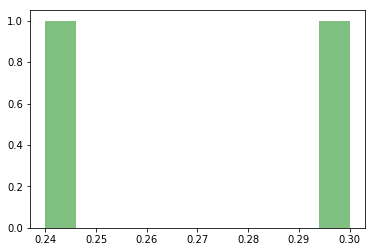

In [300]:
plt.hist([marginal_estimate(t), marginal_theory(0.2,0.8,0.9)], alpha=0.5, facecolor='green')


### Evolution of the simulation as $n$ grows

We would expect that as $n$ grows, the marginal estimate $\hat{P}(Y=0)$ should get closer to the true value. 

You will graph out the different values of the estimate for different values of $n$. For each value of $n \in \{1,2,...,N\}$, we will generate $m$ different estimates based on the length $n$ output. All of these estimates will be represented in the graph and we will then see how those evolve as $n$ gets bigger.

__TODO__ (1 pt) Define a function `graph(m,N,p,p00,p11)` that draws two overlaid graphs (use a different color for each graph). The domain of both graphs is `np.arange(1,N+1)`. Intuitively, each $n$ in the domain will specify the size of the string that we are using for $\hat{P}(Y=0)$. The first graph should be a constant function displaying the value $P(Y=0)$ computed by `marginal_theory()`. The second graph should show the output of `compute_marginal()` for each value $n$. The probabilities `p`, `p00` and `p11` have the same interpretations as before. What do you notice?

In [ ]:
#insert your code

m = 20
N = 250
p = 0.2
p00 = 0.8
p11 = 0.9

graph(m,N,p,p00,p11)